##### QTimeEdit 時間調整元件
QTimeEdit 是 PyQt5 裡的時間調整元件，這篇教學會介紹如何在 PyQt5 視窗裡加入 QTimeEdit 時間調整元件，並實做透過該元件調整時間並將調整的時間顯示出來的簡單應用。

##### 加入 QTimeEdit 時間調整元件 
建立 PyQt5 視窗物件後，透過 QtWidgets.QTimeEdit(widget) 方法，就能在指定的元件中建立時間調整元件。

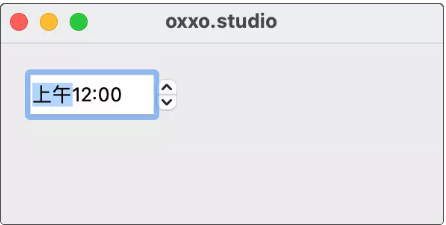

調整時，需要先點擊要調整的時間位置，就可以針對該位置的時間進行調整。

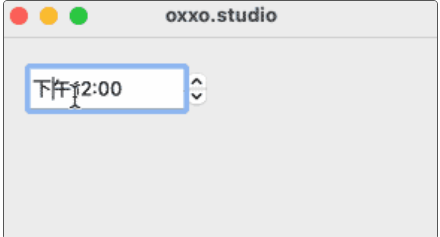

In [ ]:
from PyQt5 import QtWidgets
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

timeedit = QtWidgets.QTimeEdit(Form)
timeedit.setGeometry(20,20,200,30)

Form.show()
sys.exit(app.exec_())

##### 時間格式設定 
使用 setDisplayFormat() 方法可以調整時間的顯示格式，預設「上午 時：分」顯示方式的格式為「ap hh:mm」，若調整為「hh:mm:ss」就會變成 24 小時制並且有秒數，\
如果調整為「hh:mm:ss ap」，則會變成 12 小時制，上午下午放在最後方，下方的程式碼會列出三組不同格式的時間調整元件。

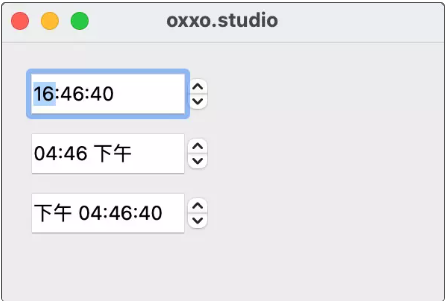

In [ ]:
from PyQt5 import QtWidgets, QtCore
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

now = QtCore.QTime.currentTime()

t1 = QtWidgets.QTimeEdit(Form)
t1.setGeometry(20,20,200,30)
t1.setDisplayFormat('hh:mm:ss')
t1.setTime(now)

t2 = QtWidgets.QTimeEdit(Form)
t2.setGeometry(20,60,200,30)
t2.setDisplayFormat('hh:mm ap')
t2.setTime(now)

t3 = QtWidgets.QTimeEdit(Form)
t3.setGeometry(20,100,200,30)
t3.setDisplayFormat('ap hh:mm:ss')
t3.setTime(now)

Form.show()
sys.exit(app.exec_())

如果要設定時間調整的範圍，需要搭配 QtCore.QTime(h, m ,s) 方法，下方的程式碼執行後，會將時間調整的範圍限制在 10:00:00～20:00:00。

In [ ]:
from PyQt5 import QtWidgets, QtCore
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)


now = QtCore.QTime.currentTime()

t1 = QtWidgets.QTimeEdit(Form)
t1.setGeometry(20,20,120,30)
t1.setDisplayFormat('hh:mm:ss')
t1.setTimeRange(QtCore.QTime(10, 00, 00), QtCore.QTime(20, 00, 00))  # 設定時間範圍

Form.show()
sys.exit(app.exec_())

##### 時間調整元件常用方法 
下方列出 QTimeEdit 時間調整元件的常用方法：

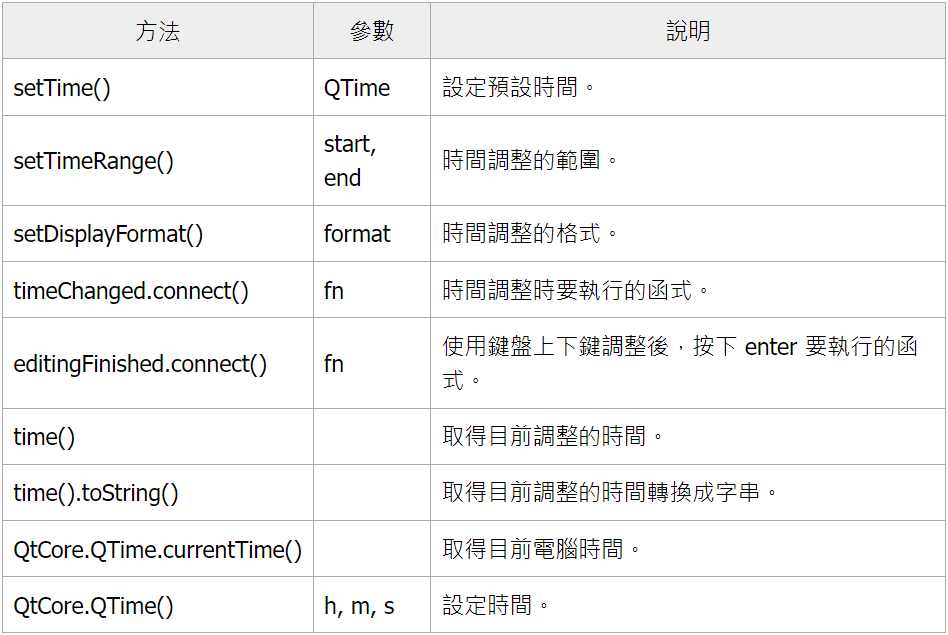

##### 顯示時間調整元件的內容 
運用 timeChanged.connect(fn) 方法，就能在調整時間時，執行特定的函式，下方的程式碼執行後，會透過 QLabel 顯示調整的時間。

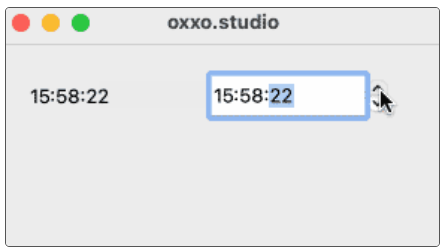

In [ ]:
from PyQt5 import QtWidgets, QtCore
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(400, 200)

label = QtWidgets.QLabel(Form)
label.setGeometry(20,20,200,30)

def show():
    label.setText(t1.time().toString())  # 顯示時間

now = QtCore.QTime.currentTime()   # 取得目前電腦時間

t1 = QtWidgets.QTimeEdit(Form)
t1.setGeometry(140,20,200,30)
t1.setDisplayFormat('hh:mm:ss')
t1.setTime(now)                    # 設定時間
t1.setTimeRange(QtCore.QTime(3, 00, 00), QtCore.QTime(23, 30, 00))
t1.timeChanged.connect(show)

Form.show()
sys.exit(app.exec_())

##### 改用 class 的寫法 
上方的程式碼，亦可改用 class 的寫法表示。

In [ ]:
# 從 PyQt5 包導入 QtWidgets 和 QtCore 模組。QtWidgets 提供了一套UI元件，QtCore 包含了非UI的功能，如時間、檔案和目錄的處理。
from PyQt5 import QtWidgets, QtCore
# 導入 sys 模組，用於接收命令行參數，並在應用結束時，提供退出方法。
import sys

# 定義一個 MyWidget 類，繼承自 QtWidgets.QWidget，QWidget 是所有用戶介面對象的基類。
class MyWidget(QtWidgets.QWidget):
    # MyWidget 類的建構子
    def __init__(self):
        # 調用父類的建構子
        super().__init__()
        # 設置視窗的標題
        self.setWindowTitle('oxxo.studio')
        # 設置視窗的初始大小
        self.resize(300, 200)
        # 初始化用戶介面
        self.ui()

    # 一個用於初始化介面元件的方法
    def ui(self):
        # 創建一個 QLabel 對象，並將其父對件設為當前視窗（self）
        self.label = QtWidgets.QLabel(self)
        # 設置標籤的位置和大小
        self.label.setGeometry(20,20,120,30)

        # 獲取當前的系統時間
        now = QtCore.QTime.currentTime()

        # 創建一個 QTimeEdit 對象，用於時間的輸入和顯示
        self.t1 = QtWidgets.QTimeEdit(self)
        # 設置 QTimeEdit 的位置和大小
        self.t1.setGeometry(140,20,120,30)
        # 設置時間顯示的格式
        self.t1.setDisplayFormat('hh:mm:ss')
        # 設置 QTimeEdit 的初始時間為當前時間
        self.t1.setTime(now)
        # 設置可選時間的範圍
        self.t1.setTimeRange(QtCore.QTime(3, 00, 00), QtCore.QTime(23, 30, 00))
        # 當時間發生變化時，連接到 showMsg 方法
        self.t1.timeChanged.connect(self.showMsg)

    # 當 QTimeEdit 的時間變化時，調用的方法
    def showMsg(self):
        # 將 QLabel 的文本設置為 QTimeEdit 當前的時間（轉換為字符串）
        self.label.setText(self.t1.time().toString())

# 判斷此腳本是否為主程式入口
if __name__ == '__main__':
    # 創建一個 QApplication 對象，這是每個 PyQt 應用必須有的
    app = QtWidgets.QApplication(sys.argv)
    # 創建 MyWidget 的實例
    Form = MyWidget()
    # 顯示窗口
    Form.show()
    # 開始應用的事件循環，等待事件發生，並在關閉窗口時結束程序
    sys.exit(app.exec_())